In [3]:
########## Time series analysis #############
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_excel("revenues.xlsx",index_col=0)

In [5]:
df

,Sales
Date,
1990-01-01,77.451
1990-04-01,84.077
1990-07-01,105.301
1990-10-01,80.290
1991-01-01,94.524
...,...
2018-01-01,7351.000
2018-04-01,7797.000
2018-07-01,8440.000


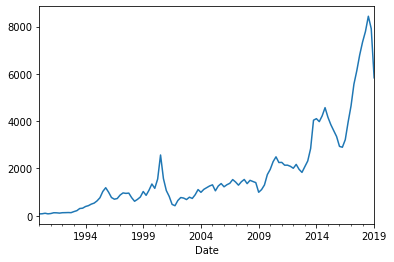

In [10]:
df["Sales"].plot()

In [6]:
############## Decompose the time series ##########################
######          Hodrick-Prescott filter   #######
cycle,trend = sm.tsa.filters.hpfilter(df["Sales"])

In [7]:
df["Cycle"]= cycle
df["Trend"]= trend

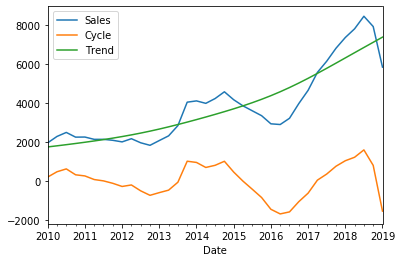

In [8]:
df["2010-01-01":].plot()

In [9]:
df["ma20"] = df["Sales"].rolling(window=4).mean()

In [10]:
##################### Exponential Weigthed Moving Average ########################
df["EWMA-6"] = df["Sales"].ewm(span=6).mean()


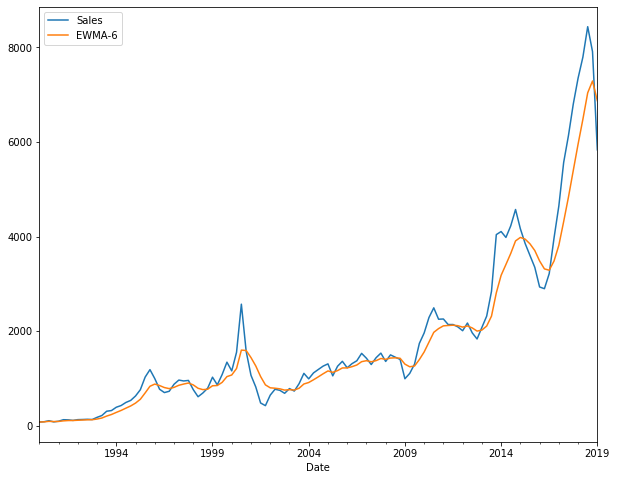

In [11]:
df[["Sales","EWMA-6"]].plot(figsize=(10,8))

In [12]:
decomp = sm.tsa.seasonal_decompose(df["Sales"],model="multiplicative")

In [13]:
########################## ARIMA code alone ##############################

In [14]:
df.head()

,Sales,Cycle,Trend,ma20,EWMA-6
Date,,,,,
1990-01-01,77.451,100.223244,-22.772244,NaN,77.451000
1990-04-01,84.077,82.471129,1.605871,NaN,81.316167
1990-07-01,105.301,79.254375,26.046625,NaN,92.098339
1990-10-01,80.290,29.625797,50.664203,86.77975,87.537235
1991-01-01,94.524,18.901677,75.622323,91.04800,89.989395


In [15]:
time_series = df["Sales"]

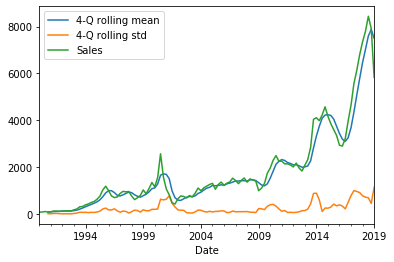

In [20]:
time_series.rolling(4).mean().plot(label="4-Q rolling mean")
time_series.rolling(4).std().plot(label="4-Q rolling std")
time_series.plot()
plt.legend()

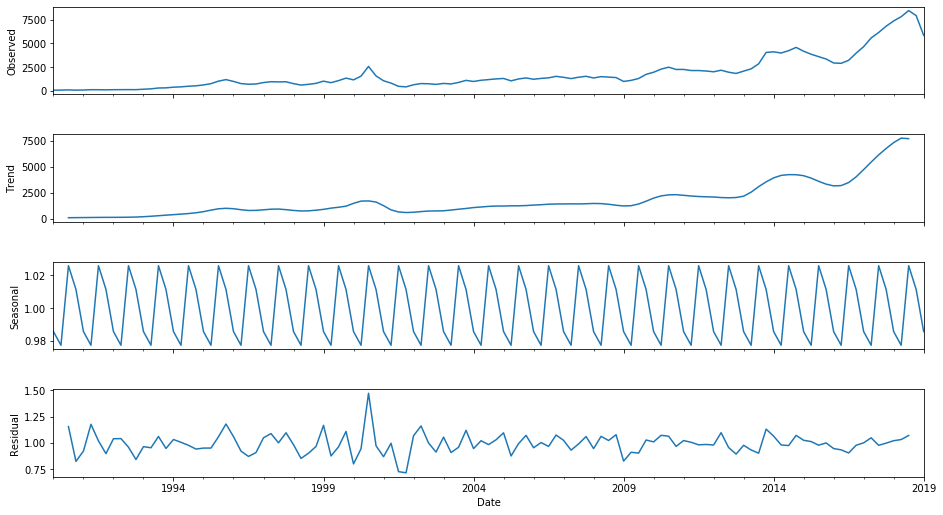

In [25]:
# Check the ets 
fig = decomp.plot()
fig.set_size_inches(15,8)

In [26]:
############# Check for startionarity using Augmented Dickey Fuller test ################
# A small p-value (p<0.05) indicates strong evidence to reject the null hypothesis, that the time series is not stationary
from statsmodels.tsa.stattools import adfuller

In [33]:
result_adf = adfuller(time_series)

In [34]:
result_adf

(3.2693430483559376,
 1.0,
 11,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 1471.9002088978898)

In [44]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Agumented Dicky Fuller Test")
    print("___________________________")
    labels = ["ADF Test statistics","P-value","#Number of lags","Num of observations"]
    
    for value,label in zip(result,labels):
        print (label+ " : "+str(value))
    
    print("___________________________")
    
    if result[1] <= 0.05:
        print ("Strong evidence against null hypothesis")
        print ("Reject null hypothesis")
        print ("Data has no unit root and is stationary")
    else:
        print ("weak evidence against null hypothesis")
        print ("Fail to reject null hypothesis")
        print ("Data has a unit root and it is  non-stationary")

In [45]:
adf_check(time_series)

Agumented Dicky Fuller Test
___________________________
ADF Test statistics : 3.2693430483559376
P-value : 1.0
#Number of lags : 11
Num of observations : 105
___________________________
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is  non-stationary


In [46]:
df["First difference"]=df["Sales"]-df["Sales"].shift(1)

In [48]:
adf_check(df["First difference"].dropna())

Agumented Dicky Fuller Test
___________________________
ADF Test statistics : -7.299067075898314
P-value : 1.3535906254427052e-10
#Number of lags : 8
Num of observations : 107
___________________________
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

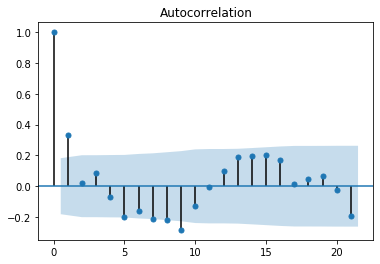

In [50]:
fig_first = plot_acf(df["First difference"].dropna())
#MA - 5,7,8,9

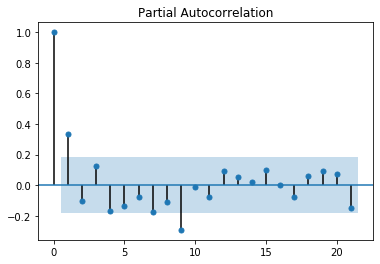

In [53]:
fig_second = plot_pacf(df["First difference"].dropna())
# AR - 9